<a href="https://colab.research.google.com/github/SushSushmithagowda/ML-101-projects/blob/main/Dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import os

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip gdrive/MyDrive/Pets/train1.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog/dog.5499.jpg  
  inflating: train/dog/dog.55.jpg    
  inflating: train/dog/dog.550.jpg   
  inflating: train/dog/dog.5500.jpg  
  inflating: train/dog/dog.5501.jpg  
  inflating: train/dog/dog.5502.jpg  
  inflating: train/dog/dog.5503.jpg  
  inflating: train/dog/dog.5504.jpg  
  inflating: train/dog/dog.5505.jpg  
  inflating: train/dog/dog.5506.jpg  
  inflating: train/dog/dog.5507.jpg  
  inflating: train/dog/dog.5508.jpg  
  inflating: train/dog/dog.5509.jpg  
  inflating: train/dog/dog.551.jpg   
  inflating: train/dog/dog.5510.jpg  
  inflating: train/dog/dog.5511.jpg  
  inflating: train/dog/dog.5512.jpg  
  inflating: train/dog/dog.5513.jpg  
  inflating: train/dog/dog.5514.jpg  
  inflating: train/dog/dog.5515.jpg  
  inflating: train/dog/dog.5516.jpg  
  inflating: train/dog/dog.5517.jpg  
  inflating: train/dog/dog.5518.jpg  
  inflating: train/dog/dog.5519.jpg  
  inflating: train/dog/dog.552.jpg   

In [4]:
!unzip gdrive/MyDrive/Pets/TEST.zip

Streaming output truncated to the last 5000 lines.
  inflating: TEST/test_cat/cat.1966.jpg  
  inflating: TEST/test_cat/cat.1967.jpg  
  inflating: TEST/test_cat/cat.1968.jpg  
  inflating: TEST/test_cat/cat.1969.jpg  
  inflating: TEST/test_cat/cat.197.jpg  
  inflating: TEST/test_cat/cat.1970.jpg  
  inflating: TEST/test_cat/cat.1971.jpg  
  inflating: TEST/test_cat/cat.1972.jpg  
  inflating: TEST/test_cat/cat.1973.jpg  
  inflating: TEST/test_cat/cat.1974.jpg  
  inflating: TEST/test_cat/cat.1975.jpg  
  inflating: TEST/test_cat/cat.1976.jpg  
  inflating: TEST/test_cat/cat.1977.jpg  
  inflating: TEST/test_cat/cat.1978.jpg  
  inflating: TEST/test_cat/cat.1979.jpg  
  inflating: TEST/test_cat/cat.198.jpg  
  inflating: TEST/test_cat/cat.1980.jpg  
  inflating: TEST/test_cat/cat.1981.jpg  
  inflating: TEST/test_cat/cat.1982.jpg  
  inflating: TEST/test_cat/cat.1983.jpg  
  inflating: TEST/test_cat/cat.1984.jpg  
  inflating: TEST/test_cat/cat.1985.jpg  
  inflating: TEST/test_cat/

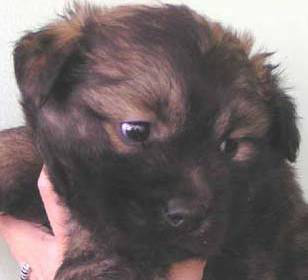

In [5]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('/content/train/dog/dog.1089.jpg')
img

In [6]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = "relu"))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = "relu"))

classifier.add(Dense(units = 1, activation = "sigmoid"))

In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [8]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,937,409
Trainable params: 3,937,409
Non-trainable params: 0
______________________________________________

In [1]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32)

test_set = test_datagen.flow_from_directory('/content/TEST',
                                                target_size = (64, 64),
                                                batch_size = 32)
classifier.fit_generator(training_set,
                    steps_per_epoch = (8000/32),
                    epochs = 25,
                    validation_data = test_set,
                    validation_steps = (2000/32))

NameError: ignored

In [ ]:
 test_image = image.load_img('/content/2.jpg',
                            target_size = (64, 64))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
result = classifier.predict(test_image)

In [ ]:
training_set.class_indices

In [ ]:
if result[0][0] == 1:
  print('Dog')
else:
  print('Cat')